# Traffic Signs Recognition / Classification(43types(0-42))

# Aim of the project

In [ ]:
In this project, you have to build a Deep Neural Network model that can classify traffic signs present in the image,
                                                                                                     into different categories.
    
With this model, 
We should be able to read and understand traffic signs which are a very important task for all autonomous vehicles.

# About the Dataset:--

# Project work flow

# Import required libraries

In [144]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image

from sklearn.model_selection import train_test_split

import tensorflow
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Directly Import the dataset in zip type file

In [145]:
import zipfile
with zipfile.ZipFile("Dataset.zip","r") as zip_ref:
    zip_ref.extractall()

# Read the required dataset

In [146]:
import pandas as pd
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')


##  data(X-independent features) , labels(y-dependent feature) storing in the list form

In [149]:
data = []  #dependent features(x)

labels = [] #Independent features(y)

In [147]:
# We have 43 Classes
import os
classes = 43
cur_path = os.getcwd()

In [148]:
cur_path

'C:\\Users\\USER\\140-Fliprobo\\DL-NN-Traffic signal identification project'

# Images Preprocess technique

# Filtering code

In [150]:
for i in range(classes): # We have 43 Classes #This loop will iterate 43 times(0-42)
    
                              #'file name'   
                                        #iteration from 0 t0 42 folders inside train folder
    path = os.path.join(cur_path,'train',str(i))
                      #'C:\\Users\\USER\\140-Fliprobo\\DL-NN-Traffic signal identification project'
    
    images = os.listdir(path)
    
    
    for a in images:
        try:             #open the image
            image = Image.open(path + '\\'+ a)
                        #resizing all images to 30 X 30 which is suitable for DL model feeding.
            image = image.resize((30,30))
                     #coverting to array
            image = np.array(image)
                 #appending the image #data=[] -->empty list
            data.append(image)
           #labels=[] -->empty list #appending the image
            labels.append(i)
                        #1st iteration(0th folder inside train folder) is completed till here.
                #iteration back to next folder(1)(then 2,3...42)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [151]:
data = np.array(data)
labels = np.array(labels)

In [152]:
data

array([[[[ 75,  78,  80],
         [ 74,  76,  78],
         [ 85,  86,  84],
         ...,
         [ 68,  75,  74],
         [ 65,  69,  68],
         [ 66,  67,  66]],

        [[ 83,  84,  86],
         [ 80,  80,  82],
         [ 88,  88,  83],
         ...,
         [ 73,  77,  78],
         [ 76,  78,  75],
         [ 80,  80,  78]],

        [[ 78,  78,  80],
         [ 86,  85,  86],
         [ 90,  89,  90],
         ...,
         [ 71,  74,  71],
         [ 73,  74,  69],
         [ 78,  78,  74]],

        ...,

        [[133, 134, 139],
         [123, 127, 132],
         [112, 121, 125],
         ...,
         [ 94,  95,  89],
         [ 97,  98,  91],
         [ 99, 103,  99]],

        [[ 91,  95,  99],
         [ 91,  98, 103],
         [ 75,  86,  90],
         ...,
         [104, 102,  96],
         [110, 113, 104],
         [ 96, 104,  98]],

        [[ 85,  84,  87],
         [ 95, 101, 107],
         [ 63,  76,  81],
         ...,
         [103, 103,  95],
        

In [153]:
data.shape,labels.shape

((39209, 30, 30, 3), (39209,))

In [154]:
labels

array([ 0,  0,  0, ..., 42, 42, 42])

In [155]:
#Shape must be same
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


# Splitting the training data,keeping 20% for testing ,training accuracy check.
test_size=0.2

In [156]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [157]:
#Shape must be same
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [158]:
X_train

array([[[[ 23,  20,  22],
         [ 24,  21,  23],
         [ 24,  22,  23],
         ...,
         [ 21,  19,  21],
         [ 20,  18,  20],
         [ 21,  19,  20]],

        [[ 21,  19,  21],
         [ 22,  20,  20],
         [ 22,  21,  21],
         ...,
         [ 21,  18,  20],
         [ 21,  18,  21],
         [ 21,  19,  20]],

        [[ 21,  19,  20],
         [ 21,  20,  20],
         [ 22,  20,  21],
         ...,
         [ 20,  17,  19],
         [ 20,  18,  19],
         [ 21,  19,  20]],

        ...,

        [[ 21,  18,  20],
         [ 20,  19,  21],
         [ 21,  19,  20],
         ...,
         [ 19,  17,  18],
         [ 18,  17,  18],
         [ 19,  18,  20]],

        [[ 21,  19,  21],
         [ 22,  20,  22],
         [ 23,  20,  21],
         ...,
         [ 19,  16,  18],
         [ 18,  17,  19],
         [ 19,  17,  19]],

        [[ 19,  17,  20],
         [ 20,  18,  20],
         [ 21,  19,  21],
         ...,
         [ 17,  15,  18],
        

In [159]:
X_test

array([[[[255, 246, 222],
         [255, 252, 225],
         [254, 241, 214],
         ...,
         [253, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[198, 188, 174],
         [165, 160, 152],
         [130, 124, 116],
         ...,
         [220, 239, 248],
         [255, 255, 255],
         [255, 255, 255]],

        [[159, 140, 125],
         [ 87,  89,  88],
         [ 84,  82,  87],
         ...,
         [202, 226, 242],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[120, 114, 115],
         [113, 114, 121],
         [112, 113, 118],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[119, 119, 125],
         [122, 123, 130],
         [118, 117, 121],
         ...,
         [249, 250, 249],
         [244, 244, 243],
         [235, 234, 234]],

        [[114, 114, 120],
         [114, 113, 115],
         [112, 111, 116],
         ...,
         [ 76,  76,  75],
        

In [160]:
y_train

array([ 5,  4, 35, ..., 26, 13,  2])

In [161]:
y_test

array([12, 13, 31, ..., 26,  7,  4])

# Convert labels to onehot encoding

In [162]:
# Function to_categorical() is used in keras for one hot-encoding(dummies)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Model building

In [163]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
#The output must be from 0-42 classes present in the dataset.
model.add(Dense(43, activation='softmax'))
                               #softmax is used in case of image classification problems.


In [192]:
model.layers

In [193]:
model.input_shape

(None, 30, 30, 3)

In [194]:
model.output_shape

(None, 43)

In [195]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 64)         

# Model Compilation

In [164]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the training data--> X_train, y_train  with epochs=20 and validation(output) validation_data=(X_test, y_test)

In [165]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 126s 128ms/step - loss: 2.1987 - accuracy: 0.4379 - val_loss: 0.8810 - val_accuracy: 0.7678
Epoch 2/20
981/981 [==============================] - 126s 128ms/step - loss: 0.8337 - accuracy: 0.7546 - val_loss: 0.2558 - val_accuracy: 0.9311
Epoch 3/20
981/981 [==============================] - 124s 127ms/step - loss: 0.4593 - accuracy: 0.8654 - val_loss: 0.1633 - val_accuracy: 0.9589
Epoch 4/20
981/981 [==============================] - 124s 126ms/step - loss: 0.3434 - accuracy: 0.9016 - val_loss: 0.1154 - val_accuracy: 0.9686
Epoch 5/20
981/981 [==============================] - 124s 126ms/step - loss: 0.2760 - accuracy: 0.9199 - val_loss: 0.0805 - val_accuracy: 0.9784
Epoch 6/20
981/981 [==============================] - 124s 127ms/step - loss: 0.2628 - accuracy: 0.9257 - val_loss: 0.1015 - val_accuracy: 0.9711
Epoch 7/20
981/981 [==============================] - 124s 126ms/step - loss: 0.2259 - accuracy: 0.9373 - val_loss: 0.0706 -

# MAX TRAINING accuracy at epochs=15 --->94.49%

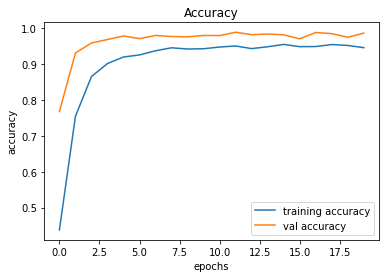

In [166]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

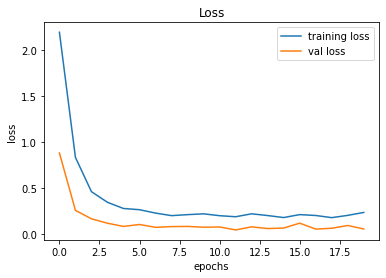

In [167]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Testing on test data(Test.csv) 

In [168]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [173]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    
    label = y_test["ClassId"].values
    imgpath = y_test["Path"].values
    
#Same as done for training data

    data=[]
    
    for img in imgpath:
        image = Image.open(img)
        image = image.resize((30,30))
        
        data.append(np.array(image))
        
    X_test=np.array(data)
    return X_test,label

In [174]:
X_test, label = testing('Test.csv')

In [176]:
Y_pred = model.predict_classes(X_test)
Y_pred

array([16,  1, 38, ...,  1,  7, 10], dtype=int64)

## Accuracy with the test data

In [177]:
from sklearn.metrics import accuracy_score

print(accuracy_score(label, Y_pred))

0.9454473475851148


## Save the model

In [181]:
model.save("output_trafficsignals.h5")

## Load the Model

In [182]:
from tensorflow.keras.models import load_model
model = load_model('output_trafficsignals.h5')

# Visualization

In [183]:
# Classes of trafic signs,making a dictionary
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [184]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  End speed + passing limits


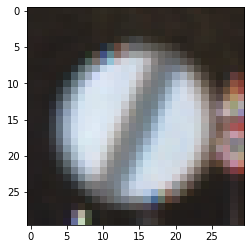

In [196]:
                  #Just change the 'number'.png to get the prections here directly.
plot,prediction = test_on_img(r'Test\00506.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

# Conclusion

In this Deep Neural Network model we can classify traffic signs present in the image,into different categories.
    
With this model, 
We are to read and understand traffic signs which are a very important task for all autonomous vehicles.